### TensorFlow & PyTorch comparison
Storing and handling data, creating datasets

<img src='https://cdn.activestate.com/wp-content/uploads/2019/10/neural-network-showndown-tensorflow-vs-pytorch.png' width = 650>

In [1]:
import tensorflow as tf
import torch
torch.manual_seed(91) # for reproducibility

print('TensorFlow version:', tf.__version__)
print('PyTorch version:', torch.__version__)

import numpy as np
import warnings
warnings.filterwarnings('ignore')

TensorFlow version: 2.8.0
PyTorch version: 1.10.2


### Scalars

In [2]:
a = 4

a_np = np.array(a) 
a_tf = tf.constant(a)
a_torch = torch.tensor(a)

print(a_np, '\n')
print(a_tf, '\n')
print(a_torch, '\n')

# converting from numpy

tf_from_numpy = tf.convert_to_tensor(a_np)
torch_from_numpy = torch.from_numpy(a_np)

print(tf_from_numpy, '\n')
print(torch_from_numpy, '\n')

4 

tf.Tensor(4, shape=(), dtype=int32) 

tensor(4) 

tf.Tensor(4, shape=(), dtype=int32) 

tensor(4, dtype=torch.int32) 



In [3]:
print(a_tf.shape)
print(a_tf.dtype)
print(a_tf.numpy())

()
<dtype: 'int32'>
4


In [4]:
print(a_torch.shape)
print(a_torch.dtype)
print(a_torch.numpy())

torch.Size([])
torch.int64
4


In [5]:
print(torch_from_numpy.shape)
print(torch_from_numpy.dtype)
print(torch_from_numpy.numpy())

torch.Size([])
torch.int32
4


### Tensors

In [6]:
m = [[1, 1, 3], [1, 0, 2]]

m_np = np.array(m) 
m_tf = tf.constant(m)
m_torch = torch.tensor(m)

print(m_np, '\n')
print(m_tf, '\n')
print(m_torch, '\n')

# converting from numpy

tf_from_numpy = tf.convert_to_tensor(m_np)
torch_from_numpy = torch.from_numpy(m_np)

print(tf_from_numpy, '\n')
print(torch_from_numpy, '\n')

[[1 1 3]
 [1 0 2]] 

tf.Tensor(
[[1 1 3]
 [1 0 2]], shape=(2, 3), dtype=int32) 

tensor([[1, 1, 3],
        [1, 0, 2]]) 

tf.Tensor(
[[1 1 3]
 [1 0 2]], shape=(2, 3), dtype=int32) 

tensor([[1, 1, 3],
        [1, 0, 2]], dtype=torch.int32) 



In [7]:
print(m_tf.shape)
print(m_tf.dtype)

(2, 3)
<dtype: 'int32'>


In [8]:
print(m_torch.shape)
print(m_torch.dtype)

torch.Size([2, 3])
torch.int64


In [9]:
print(torch_from_numpy.shape)
print(torch_from_numpy.dtype)

torch.Size([2, 3])
torch.int32


### Multiplication, matrix multiplication

In [10]:
np.multiply(m_np, m_np)

array([[1, 1, 9],
       [1, 0, 4]])

In [11]:
tf.multiply(m_tf, m_tf)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 9],
       [1, 0, 4]])>

In [12]:
torch.multiply(m_torch, m_torch)

tensor([[1, 1, 9],
        [1, 0, 4]])

In [13]:
np.matmul(m_np, m_np.transpose())

array([[11,  7],
       [ 7,  5]])

In [14]:
tf.matmul(m_tf, tf.transpose(m_tf))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11,  7],
       [ 7,  5]])>

In [15]:
torch.matmul(m_torch, m_torch.T)

tensor([[11,  7],
        [ 7,  5]])

In [16]:
# all are equivalent to:
m_torch @ m_torch.T

tensor([[11,  7],
        [ 7,  5]])

### PyTorch device

PyTorch can directly access GPU too, so (after some config) it's your choice where you want to process the data

In [17]:
a_torch.device

device(type='cpu')

In [18]:
print(torch.cuda.is_available())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if torch.cuda.is_available():
    a_torch = a_torch.to('cuda')

False
Using device: cpu


### PyTorch autograd

Automatically includes gradient in Tensors

Turning it off:
- for given tensor: `requires_grad=False` 
- globally: `with torch.nograd():`
    


<img src='https://camo.githubusercontent.com/fe04780daa63b97b30b69ce1208c40f74b9e33cda32128e6c8a9839587d7a216/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a774531663269374c385152773869755678356d4f70772e706e67' width = 550>

In [19]:
from torchviz import make_dot
from IPython.display import Image

In [20]:
x = torch.tensor(np.array([1, 2, 3, 4, 5], dtype = 'float'), requires_grad=True)

y = x**3 + x*2
z = y + 10

r = z.sum()

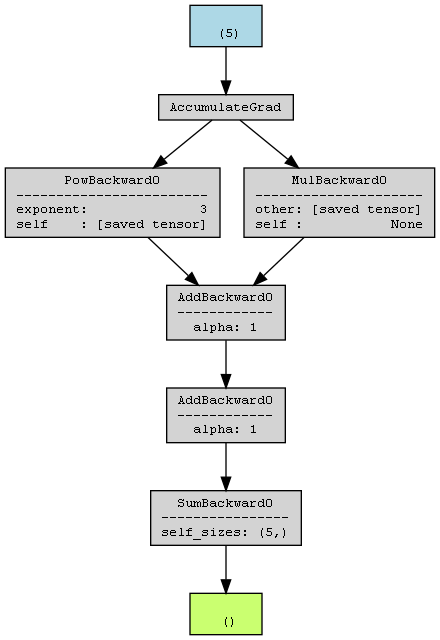

In [21]:
path_image = "torch_viz/attached"
_format = 'png'

make_dot(r, show_attrs = True).render(path_image, format = _format)
Image(path_image + '.' + _format, height = 450)

In [22]:
x

tensor([1., 2., 3., 4., 5.], dtype=torch.float64, requires_grad=True)

In [23]:
y

tensor([  3.,  12.,  33.,  72., 135.], dtype=torch.float64,
       grad_fn=<AddBackward0>)

In [24]:
z

tensor([ 13.,  22.,  43.,  82., 145.], dtype=torch.float64,
       grad_fn=<AddBackward0>)

In [25]:
r

tensor(305., dtype=torch.float64, grad_fn=<SumBackward0>)

In [26]:
x.grad_fn

In [27]:
y.grad_fn

In [28]:
z.grad_fn

In [29]:
r.grad_fn

'r' is the 'output', so we can 'backpropagate' to the very beginning

In [30]:
r.grad_fn

In [31]:
r.grad_fn.next_functions[0][0]

In [32]:
r.grad_fn.next_functions[0][0].next_functions[0][0]

In [33]:
r.grad_fn.next_functions[0][0].next_functions[0][0].next_functions

((<PowBackward0 at 0x268146494f0>, 0), (<MulBackward0 at 0x268146499d0>, 0))

In [34]:
r.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0]

In [35]:
r.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions

()

How to get the actual derivatives?

In [36]:
r.backward()

In [37]:
x

tensor([1., 2., 3., 4., 5.], dtype=torch.float64, requires_grad=True)

In [38]:
x.grad

tensor([ 5., 14., 29., 50., 77.], dtype=torch.float64)

Function: $x^{3} + 2x$ + 10

Derivative: $3x^{2} + 2$ 

**x.grad elements are exactly the derivatives of x elements**

## Datasets for DL

For TF and torch come with their own dataset-handling wrappers that help training. The goal is to put the X and y in the most optimal format before training NNs


In [2]:
import datetime
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression, make_sparse_uncorrelated
%load_ext tensorboard

In [3]:
X, y = make_sparse_uncorrelated(1000, 4, random_state = 91)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 91, train_size = 0.8)

How easy is it to model the data?



In [402]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


lr = LinearRegression().fit(X_train, y_train)
print('RMSE LinReg:', mean_squared_error(y_test, lr.predict(X_test), squared=False))
print('r2 LinReg:', r2_score(y_test, lr.predict(X_test)))

RMSE LinReg: 1.0598040720997706
r2 LinReg: 0.9185904325568609



### TensorFlow

In [403]:
from tensorflow.data import Dataset

In [404]:
Dataset.from_tensor_slices((X, y))

<TensorSliceDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [405]:
[x for x in Dataset.from_tensor_slices((X, y))][:10]

[(<tf.Tensor: shape=(4,), dtype=float64, numpy=array([-0.60612102, -1.05993975, -0.55091967, -0.27568627])>,
  <tf.Tensor: shape=(), dtype=float64, numpy=0.6211824216799966>),
 (<tf.Tensor: shape=(4,), dtype=float64, numpy=array([ 1.22225373, -0.90585899,  0.06935217,  2.17865566])>,
  <tf.Tensor: shape=(), dtype=float64, numpy=-5.045025241674523>),
 (<tf.Tensor: shape=(4,), dtype=float64, numpy=array([ 0.14731691,  0.51725713, -1.29397945, -1.0548876 ])>,
  <tf.Tensor: shape=(), dtype=float64, numpy=4.40408336785234>),
 (<tf.Tensor: shape=(4,), dtype=float64, numpy=array([0.46476874, 0.23410601, 1.77886602, 0.86387667])>,
  <tf.Tensor: shape=(), dtype=float64, numpy=-3.656616819939237>),
 (<tf.Tensor: shape=(4,), dtype=float64, numpy=array([-0.02505936, -0.15748755, -0.69803799, -0.17109056])>,
  <tf.Tensor: shape=(), dtype=float64, numpy=0.8741320952221957>),
 (<tf.Tensor: shape=(4,), dtype=float64, numpy=array([-0.66477563,  0.57844215,  2.11737829, -0.44639435])>,
  <tf.Tensor: sha

In [406]:
Dataset.from_tensors((X, y))

<TensorDataset element_spec=(TensorSpec(shape=(1000, 4), dtype=tf.float64, name=None), TensorSpec(shape=(1000,), dtype=tf.float64, name=None))>

In [407]:
[x for x in Dataset.from_tensors((X, y))]

[(<tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
  array([[-0.60612102, -1.05993975, -0.55091967, -0.27568627],
         [ 1.22225373, -0.90585899,  0.06935217,  2.17865566],
         [ 0.14731691,  0.51725713, -1.29397945, -1.0548876 ],
         ...,
         [ 1.71064186,  0.58880101, -3.15157693, -1.3577635 ],
         [-0.2008195 ,  2.46525881,  1.23490332, -0.19678863],
         [-2.09930991, -0.86142285, -1.01306882, -0.50562339]])>,
  <tf.Tensor: shape=(1000,), dtype=float64, numpy=
  array([ 6.21182422e-01, -5.04502524e+00,  4.40408337e+00, -3.65661682e+00,
          8.74132095e-01, -2.46749614e+00, -3.94996916e+00,  1.08440355e+01,
          5.60660953e-01,  8.87308150e-01,  4.14963770e+00, -3.01479165e+00,
         -6.18279644e-01,  1.44367833e+00,  5.57109007e+00, -9.59344050e-02,
         -1.36674470e+00,  1.13976415e+00,  5.10246521e+00, -6.58202638e-01,
         -2.18436493e+00,  3.43178682e+00,  3.69990417e+00,  6.68486892e-01,
          2.90822252e+00,  4.63863450e+

Add metainfo to the dataset
- shuffle: at each step randomly shuffle the dataset (buffer = take from first n)
- batch: set batch size for dataset

In [513]:
BATCH_SIZE = 20
#SHUFFLE_BUFFER_SIZE = 100
EPOCHS = 50

train_dataset = Dataset.from_tensor_slices((X_train, y_train)).batch(BATCH_SIZE) #?.shuffle(SHUFFLE_BUFFER_SIZE)
test_dataset = Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH_SIZE) #?.shuffle(SHUFFLE_BUFFER_SIZE)

In [548]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', name = 'hidden-layer', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='linear', name = 'output-layer')
], name = 'Small-TF-model')

model.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.losses.MeanSquaredError(),
              metrics = [tf.metrics.RootMeanSquaredError()])

model.build()

In [549]:
model.summary()

Model: "Small-TF-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer (Dense)        (None, 10)                50        
                                                                 
 output-layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


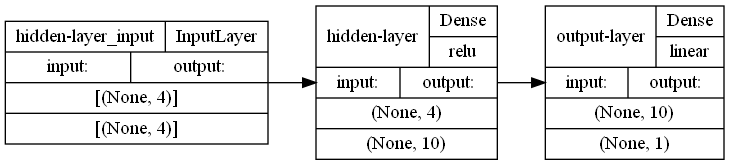

In [550]:
tf.keras.utils.plot_model(model, to_file = 'torch_viz/tf_model.png', show_shapes = True, rankdir = 'LR',
                         show_dtype = False, show_layer_activations = True)

In [551]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_dataset, validation_data = test_dataset, epochs = EPOCHS, callbacks=[tensorboard_callback])

Epoch 1/50
40/40 [==============================] - 1s 6ms/step - loss: 9.7994 - root_mean_squared_error: 3.1304 - val_loss: 9.3032 - val_root_mean_squared_error: 3.0501
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 8.5785 - root_mean_squared_error: 2.9289 - val_loss: 8.0949 - val_root_mean_squared_error: 2.8452
Epoch 3/50
40/40 [==============================] - 0s 5ms/step - loss: 7.4367 - root_mean_squared_error: 2.7270 - val_loss: 6.9688 - val_root_mean_squared_error: 2.6399
Epoch 4/50
40/40 [==============================] - 0s 4ms/step - loss: 6.3721 - root_mean_squared_error: 2.5243 - val_loss: 5.9110 - val_root_mean_squared_error: 2.4313
Epoch 5/50
40/40 [==============================] - 0s 4ms/step - loss: 5.3904 - root_mean_squared_error: 2.3217 - val_loss: 4.9757 - val_root_mean_squared_error: 2.2306
Epoch 6/50
40/40 [==============================] - 0s 4ms/step - loss: 4.5173 - root_mean_squared_error: 2.1254 - val_loss: 4.1624 - val_root_mean_sq

Epoch 49/50
40/40 [==============================] - 0s 4ms/step - loss: 1.0157 - root_mean_squared_error: 1.0078 - val_loss: 1.2461 - val_root_mean_squared_error: 1.1163
Epoch 50/50
40/40 [==============================] - 0s 4ms/step - loss: 1.0147 - root_mean_squared_error: 1.0073 - val_loss: 1.2448 - val_root_mean_squared_error: 1.1157


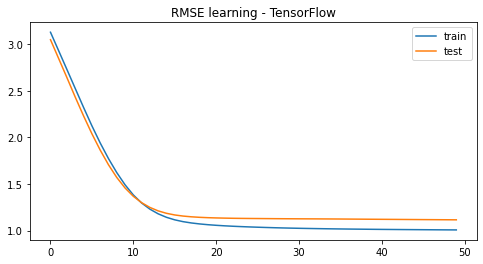

In [552]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = 'train')
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = 'test')
plt.title('RMSE learning - TensorFlow')
plt.legend()
plt.show()

Check tuned weights

In [521]:
model.layers

In [522]:
model.layers[0].get_weights()

[array([[-0.2773961 ,  0.15915233, -0.3882694 ,  0.43514067, -0.19979078,
         -0.9241295 , -0.13114335,  0.5439763 ,  0.22312748,  0.45713684],
        [-1.058975  , -0.9234115 , -0.47838262, -0.41870007,  0.07130191,
         -1.0665795 , -0.4518924 ,  0.9233572 ,  0.4943078 ,  0.9881111 ],
        [ 0.9985946 ,  0.33496082,  0.7540114 , -0.24981283, -0.21149775,
          0.9678238 ,  0.4769239 , -0.9658604 , -0.83213264, -0.74734354],
        [ 0.19648325,  0.7531424 ,  0.46130264,  0.15285146,  0.31007582,
          0.50723606,  1.0455914 , -1.5069048 , -0.17824586, -0.30560127]],
       dtype=float32),
 array([-0.11333323,  0.17961136,  0.37786236, -0.00927476, -0.13619752,
         0.29720107,  0.38980415,  0.21114005,  0.09650008,  0.24481063],
       dtype=float32)]

In [523]:
model.layers[1].get_weights()

[array([[-0.5996448 ],
        [-0.37057444],
        [-0.615162  ],
        [ 0.15382332],
        [-0.20188062],
        [-0.42453787],
        [-0.42316556],
        [ 0.6326627 ],
        [ 0.57920146],
        [ 0.9498263 ]], dtype=float32),
 array([0.13870725], dtype=float32)]

Check TensorBoard

If need to kill: C:\Users\krist\AppData\Local\Temp\.tensorboard-info

In [524]:
#%tensorboard --logdir logs/fit


### PyTorch

In [4]:
# import torch

from torch.utils.data import TensorDataset, DataLoader

import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

Try some activations

In [526]:
i = np.array(0.23)
i = torch.Tensor(i)

print(F.elu(i))
print(F.relu(i))
print(F.leaky_relu(i))
print(F.celu(i))
print(F.gelu(i))
print(F.sigmoid(i))
print(F.softmax(i))
print(F.tanh(i))

tensor(0.2300)
tensor(0.2300)
tensor(0.2300)
tensor(0.2300)
tensor(0.1359)
tensor(0.5572)
tensor(1.)
tensor(0.2260)


In [527]:
i = np.array(-0.23)
i = torch.Tensor(i)

print(F.elu(i))
print(F.relu(i))
print(F.leaky_relu(i))
print(F.celu(i))
print(F.gelu(i))
print(F.sigmoid(i))
print(F.softmax(i))
print(F.tanh(i))

tensor(-0.2055)
tensor(0.)
tensor(-0.0023)
tensor(-0.2055)
tensor(-0.0941)
tensor(0.4428)
tensor(1.)
tensor(-0.2260)


In [528]:
torch_train_data = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
torch_train_data = DataLoader(torch_train_data, batch_size = BATCH_SIZE)

torch_test_data = TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test))
torch_test_data = DataLoader(torch_test_data, batch_size = BATCH_SIZE)

In [529]:
torch_train_data

In [530]:
torch_train_data.dataset

In [531]:
torch_train_data.dataset.tensors[0].shape

torch.Size([800, 4])

In [532]:
torch_train_data.dataset.tensors[1].shape

torch.Size([800])

In [533]:
torch_train_data.batch_size

20

In [534]:
torch_train_data.dataset.tensors[1].shape

torch.Size([800])

Match structure of model built with TensorFlow

In [553]:
class Simple_torch_NN(nn.Module):
    
    def __init__(self):
        
        super(Simple_torch_NN, self).__init__()
        
        self.hidden = nn.Linear(4, 10)
        self.output = nn.Linear(10, 1)
 
    def forward(self, x):
        
        x = F.relu(self.hidden(x))
        x = self.output(x)
        
        return x

In [554]:
torch_model = Simple_torch_NN()

In [555]:
torch_model

Simple_torch_NN(
  (hidden): Linear(in_features=4, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)

Initial random weights

In [556]:
# for param in torch_model.parameters():
#     print(param, '\n')

for name, param in torch_model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param} \n")

Layer: hidden.weight | Size: torch.Size([10, 4]) | Values : Parameter containing:
tensor([[ 0.1863,  0.0018,  0.2617, -0.4968],
        [ 0.2967,  0.0464,  0.2237,  0.4651],
        [-0.4103, -0.1943, -0.1160,  0.2010],
        [ 0.3958, -0.2776, -0.1681,  0.4904],
        [-0.1974,  0.1568, -0.1762, -0.2345],
        [ 0.2704,  0.4620,  0.0917, -0.3370],
        [ 0.1598,  0.0474, -0.0711,  0.2482],
        [-0.2522, -0.2058,  0.0388,  0.4035],
        [-0.0330, -0.2633,  0.1526,  0.0222],
        [-0.3375,  0.3171, -0.1441,  0.2121]], requires_grad=True) 

Layer: hidden.bias | Size: torch.Size([10]) | Values : Parameter containing:
tensor([-0.4329, -0.3356, -0.2047, -0.3964,  0.3008,  0.3874,  0.0874,  0.4122,
        -0.2603, -0.4172], requires_grad=True) 

Layer: output.weight | Size: torch.Size([1, 10]) | Values : Parameter containing:
tensor([[ 0.0831,  0.1377,  0.2567, -0.1347, -0.1967,  0.2156,  0.1129, -0.0076,
          0.0851, -0.1361]], requires_grad=True) 

Layer: output.b

Compile

In [557]:
optimizer = optim.Adam(torch_model.parameters(), eps = 1e-07) # to match TF
loss = nn.MSELoss()

Train

- For PyTorch when training a model set it to `.train()`, when using it for inference set it to `.eval()`
- During training in each epoch's each batch reset the gradients by `optimizer.zero_grad()`
- Suggestion is to create 1 function for training, 1 for evaluating


In [558]:
train_losses = []
valid_losses = []

def train_loop(dataloader, model, loss_fn, optimizer):
    
    model.train()

    num_batches = len(dataloader)
    train_loss = 0
    
    for data, target in dataloader:
        
        # zero out gradient
        optimizer.zero_grad()
        
        # Compute prediction and loss
        pred = model(data)
        loss = loss_fn(pred, target.reshape(-1,1)) # spent 3 hours on this: target and pred need to be of same shape (-1,1)

        # Backpropagation
        loss.backward()
        optimizer.step()

        train_loss += loss.item()**(1/2)
    
    train_loss /= num_batches
    train_losses.append(train_loss)
    print(f"Losses -- train: {train_loss:>8f}", end = ' -- ')


def test_loop(dataloader, model, loss_fn):
    
    model.eval()
     
    num_batches = len(dataloader)
    test_loss = 0

    with torch.no_grad():
        
        for data, target in dataloader:
            
            pred = model(data)
            test_loss += loss_fn(pred, target.reshape(-1,1)).item()**(1/2)

    test_loss /= num_batches
    valid_losses.append(test_loss)
    print(f"test: {test_loss:>8f} \n") 

In [559]:
for t in range(EPOCHS):
    
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(torch_train_data, torch_model, loss, optimizer)
    test_loop(torch_test_data, torch_model, loss)
    
print("Done!")

Epoch 1
-------------------------------
Losses -- train: 3.604390 -- test: 3.593910 

Epoch 2
-------------------------------
Losses -- train: 3.527658 -- test: 3.516764 

Epoch 3
-------------------------------
Losses -- train: 3.441705 -- test: 3.425778 

Epoch 4
-------------------------------
Losses -- train: 3.337106 -- test: 3.313109 

Epoch 5
-------------------------------
Losses -- train: 3.207246 -- test: 3.172186 

Epoch 6
-------------------------------
Losses -- train: 3.047611 -- test: 3.000088 

Epoch 7
-------------------------------
Losses -- train: 2.856349 -- test: 2.797827 

Epoch 8
-------------------------------
Losses -- train: 2.635785 -- test: 2.569645 

Epoch 9
-------------------------------
Losses -- train: 2.392843 -- test: 2.326210 

Epoch 10
-------------------------------
Losses -- train: 2.135528 -- test: 2.075791 

Epoch 11
-------------------------------
Losses -- train: 1.876157 -- test: 1.833869 

Epoch 12
-------------------------------
Losses -- t

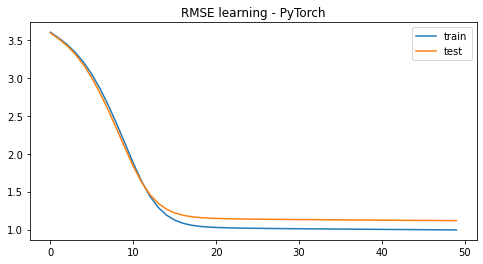

In [560]:
plt.figure(figsize=(8, 4))
plt.plot([i for i in range(EPOCHS)], train_losses, label = 'train')
plt.plot([i for i in range(EPOCHS)], valid_losses, label = 'test')
plt.title('RMSE learning - PyTorch')
plt.legend()
plt.show()

Check if PyTorch model is in `eval()` or `train()` mode

In [561]:
torch_model.training

False

Check layer gradients

In [562]:
torch_model.output.bias

Parameter containing:
tensor([0.1037], requires_grad=True)

In [563]:
torch_model.output.bias.grad

tensor([-0.1139])

TF and torch reached similar losses with the same structured models and running for same number of epochs

In [564]:
print('Last train loss reached with TensorFlow:', history.history['root_mean_squared_error'][-1])
print('Last train loss reached with PyTorch:', train_losses[-1])

Last train loss reached with TensorFlow: 1.0073187351226807
Last train loss reached with PyTorch: 0.9946260571630903


#### Make predictions

In [565]:
print('Test Performances\n', '--' * 20, '\n')

TF_predictions = model.predict(X_test)
torch_predictions = torch_model(torch_test_data.dataset.tensors[0])

print('RMSE TF:', mean_squared_error(y_test, TF_predictions, squared=False))
print('RMSE PyTorch:', mean_squared_error(y_test, torch_predictions.detach().numpy(), squared=False))
print('\n')
print('RMSE LinReg:', mean_squared_error(y_test, lr.predict(X_test), squared=False))

Test Performances
 ---------------------------------------- 

RMSE TF: 1.1157064034589026
RMSE PyTorch: 1.1344944923938338


RMSE LinReg: 1.0598040720997706


## PyTorch general guidelines

1. Define model class
    - init: layers
    - forward: activations of layers, forward pass of training samples
    
    ```python
    from torch import nn

    class model(nn.Module):        
        def __init__(self):        
            super(model, self).__init__()            
            # Define Model Here

        def forward(self, x):        
            # Define Forward Pass Here            
            return x
    
    ```
    
2. Set compilers
    - loss: function to minimize
    - optimizer: optimizer's parameters are `model.parameters()`
    
    ```python
    optimizer = optim.Adam(model.parameters())
    loss_fn = nn.MSELoss()
    ```
    
    Always check how the loss function is computed (i.e: CrossEntropyLoss() includes softmax, so last layer does not need to be activated via softmax)
    
    
3. Train and test (evaluate) functions

    - train: `model.train()`
    - evaluate / inference: `model.eval()` and `with torch.nograd()` (use both, eval changes forward function)
    - **pred and target must have same shape (-1,1), otherwise loss won't be calculated properly**

**Training without validation**
    
```python
epochs = 5
for e in range(epochs):
    model.train()
    train_loss = 0        

    for X, y in trainloader:

        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()

        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        pred = model(X)
        # Find the Loss
        loss = loss_fn(pred,y)
        # Calculate gradients via backpropagation
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()

    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(trainloader)}')

```
**Training with test set:**    

```python
epochs = 5
for e in range(epochs):
    train_loss = 0
    model.train() 
    for X, y in trainloader:

        if torch.cuda.is_available():
            X, y = X.cuda(), y.cuda()

        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred,y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    valid_loss = 0        
    model.eval()   

    with torch.no_grad():

        for X, y in validloader:

            if torch.cuda.is_available():
                X, y = X.cuda(), y.cuda()

            pred = model(X)
            loss = loss_fn(pred, y)
            valid_loss += loss.item()        

    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(trainloader)} \t\t \
          Validation Loss: {valid_loss / len(validloader)}')
```
    

    


### Try a same neural net without `relu` activation (less nonlinearities to model)

In [611]:
#####################################
########### load sources ############
#####################################

torch_train_data = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
torch_train_data = DataLoader(torch_train_data, batch_size = BATCH_SIZE)

torch_test_data = TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test))
torch_test_data = DataLoader(torch_test_data, batch_size = BATCH_SIZE)

#####################################
########### define model ############
#####################################

class Deep_torch_NN(nn.Module):
    
    def __init__(self):
        
        super(Deep_torch_NN, self).__init__()
        
        self.hidden1 = nn.Linear(4, 10)
        self.output = nn.Linear(10, 1)
 
    def forward(self, x):
        
        x = self.hidden1(x)
        x = self.output(x)
        
        return x
    
model = Deep_torch_NN()
print(model)

#####################################
########### compile model ###########
#####################################

optimizer = optim.Adam(model.parameters())
loss = nn.MSELoss()

#####################################
########### train model #############
#####################################

train_losses = []
valid_losses = []
EPOCHS = 20

for t in range(EPOCHS):
    
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(torch_train_data, model, loss, optimizer)
    test_loop(torch_test_data, model, loss)

Deep_torch_NN(
  (hidden1): Linear(in_features=4, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)
Epoch 1
-------------------------------
Losses -- train: 3.874396 -- test: 3.793321 

Epoch 2
-------------------------------
Losses -- train: 3.680959 -- test: 3.612023 

Epoch 3
-------------------------------
Losses -- train: 3.499417 -- test: 3.430854 

Epoch 4
-------------------------------
Losses -- train: 3.307459 -- test: 3.230786 

Epoch 5
-------------------------------
Losses -- train: 3.089799 -- test: 3.000800 

Epoch 6
-------------------------------
Losses -- train: 2.839231 -- test: 2.737672 

Epoch 7
-------------------------------
Losses -- train: 2.556229 -- test: 2.445765 

Epoch 8
-------------------------------
Losses -- train: 2.249175 -- test: 2.137631 

Epoch 9
-------------------------------
Losses -- train: 1.935048 -- test: 1.834304 

Epoch 10
-------------------------------
Losses -- train: 1.638700 -- test: 1.562734

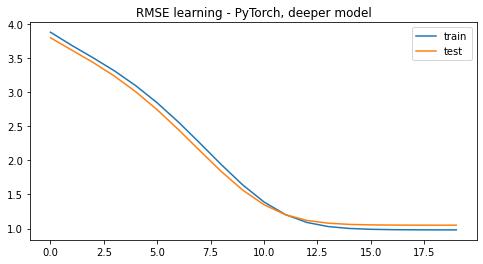

In [612]:
plt.figure(figsize=(8, 4))
plt.plot([i for i in range(EPOCHS)], train_losses, label = 'train')
plt.plot([i for i in range(EPOCHS)], valid_losses, label = 'test')
plt.title('RMSE learning - PyTorch, deeper model')
plt.legend()
plt.show()

In [613]:
print('Test Performances\n', '--' * 20, '\n')

torch_predictions = model(torch_test_data.dataset.tensors[0])

print('RMSE PyTorch:', mean_squared_error(y_test, torch_predictions.detach().numpy(), squared=False))
print('RMSE LinReg:', mean_squared_error(y_test, lr.predict(X_test), squared=False))

Test Performances
 ---------------------------------------- 

RMSE PyTorch: 1.059293160161684
RMSE LinReg: 1.0598040720997706


Reaches linreg's minimum loss after ~15 epochs

### Sinusoidal data --> clearly nonlinearities involved

In [794]:
%matplotlib inline

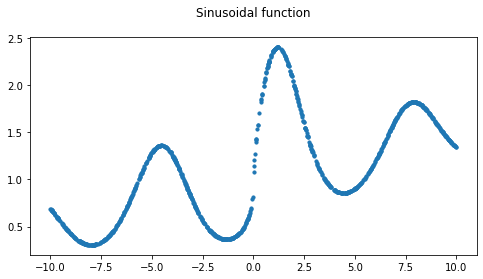

In [858]:
X = np.random.uniform(-10, 10, size = 1000).reshape(-1, 1)
y = np.exp((np.sin(X) / np.sqrt(np.abs(X)))) + X / 20

plt.figure(figsize=(8, 4))
plt.scatter(X, y, s = 10)
plt.title('Sinusoidal function\n')
plt.show()

RMSE LinReg: 0.46821979435692485


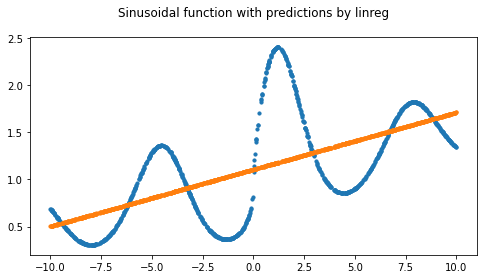

In [859]:
lr = LinearRegression().fit(X, y)
print('RMSE LinReg:', mean_squared_error(y, lr.predict(X), squared=False))

plt.figure(figsize=(8, 4))
plt.scatter(X, y, s = 10)
plt.scatter(X, lr.predict(X), s = 10)
plt.title('Sinusoidal function with predictions by linreg\n')
plt.show()

Apply neural net

In [860]:
%%time

#####################################
########### load sources ############
#####################################

torch_train_data = DataLoader(TensorDataset(torch.Tensor(X), torch.Tensor(y)), batch_size=BATCH_SIZE)

#####################################
########### define model ############
#####################################

class sinus_NN(nn.Module):
    
    def __init__(self):
        
        super(sinus_NN, self).__init__()
        
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 20)
        self.hidden3 = nn.Linear(20, 10)
        self.output = nn.Linear(10, 1)
 
    def forward(self, x):
        
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = self.output(x)
        
        return x
    
model = sinus_NN()
print(model)

#####################################
########### compile model ###########
#####################################

optimizer = optim.Adam(model.parameters())
loss = nn.MSELoss()

#####################################
########### train model #############
#####################################

train_losses = []
valid_losses = []
pred_at_each_epoch = []
EPOCHS = 250

for t in range(EPOCHS):
    
    print(f"\nEpoch {t+1}\n-------------------------------")
    train_loop(torch_train_data, model, loss, optimizer)
    
    #model.eval()
    pred_at_each_epoch.append(model(torch.Tensor(X)).detach().numpy())
    #test_loop(torch_test_data, model, loss)

sinus_NN(
  (hidden1): Linear(in_features=1, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=20, bias=True)
  (hidden3): Linear(in_features=20, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
)
Epoch 1
-------------------------------
Losses -- train: 0.920341 -- Epoch 2
-------------------------------
Losses -- train: 0.646839 -- Epoch 3
-------------------------------
Losses -- train: 0.548847 -- Epoch 4
-------------------------------
Losses -- train: 0.460056 -- Epoch 5
-------------------------------
Losses -- train: 0.396867 -- Epoch 6
-------------------------------
Losses -- train: 0.345730 -- Epoch 7
-------------------------------
Losses -- train: 0.311326 -- Epoch 8
-------------------------------
Losses -- train: 0.283025 -- Epoch 9
-------------------------------
Losses -- train: 0.259666 -- Epoch 10
-------------------------------
Losses -- train: 0.240919 -- Epoch 11
-------------------------------
Los

Losses -- train: 0.103447 -- Epoch 116
-------------------------------
Losses -- train: 0.102333 -- Epoch 117
-------------------------------
Losses -- train: 0.101062 -- Epoch 118
-------------------------------
Losses -- train: 0.099808 -- Epoch 119
-------------------------------
Losses -- train: 0.098500 -- Epoch 120
-------------------------------
Losses -- train: 0.097137 -- Epoch 121
-------------------------------
Losses -- train: 0.095835 -- Epoch 122
-------------------------------
Losses -- train: 0.094388 -- Epoch 123
-------------------------------
Losses -- train: 0.092851 -- Epoch 124
-------------------------------
Losses -- train: 0.091214 -- Epoch 125
-------------------------------
Losses -- train: 0.089559 -- Epoch 126
-------------------------------
Losses -- train: 0.087888 -- Epoch 127
-------------------------------
Losses -- train: 0.086303 -- Epoch 128
-------------------------------
Losses -- train: 0.084653 -- Epoch 129
-------------------------------
Losses

Losses -- train: 0.016210 -- Epoch 233
-------------------------------
Losses -- train: 0.016117 -- Epoch 234
-------------------------------
Losses -- train: 0.016209 -- Epoch 235
-------------------------------
Losses -- train: 0.016121 -- Epoch 236
-------------------------------
Losses -- train: 0.015928 -- Epoch 237
-------------------------------
Losses -- train: 0.015783 -- Epoch 238
-------------------------------
Losses -- train: 0.015760 -- Epoch 239
-------------------------------
Losses -- train: 0.015697 -- Epoch 240
-------------------------------
Losses -- train: 0.015841 -- Epoch 241
-------------------------------
Losses -- train: 0.015918 -- Epoch 242
-------------------------------
Losses -- train: 0.015638 -- Epoch 243
-------------------------------
Losses -- train: 0.015529 -- Epoch 244
-------------------------------
Losses -- train: 0.015659 -- Epoch 245
-------------------------------
Losses -- train: 0.015605 -- Epoch 246
-------------------------------
Losses

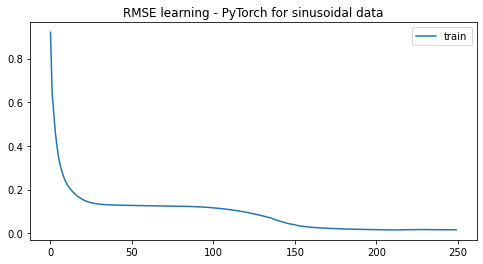

In [861]:
plt.figure(figsize=(8, 4))
plt.plot([i for i in range(EPOCHS)], train_losses, label = 'train')
plt.title('RMSE learning - PyTorch for sinusoidal data')
plt.legend()
plt.show()

RMSE PyTorch: 0.014771327804825858


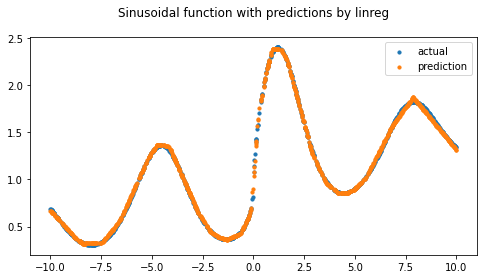

In [862]:
torch_pred = model(torch.Tensor(X)).detach().numpy()
print('RMSE PyTorch:', mean_squared_error(y, torch_pred, squared=False))

plt.figure(figsize=(8, 4))
plt.scatter(X, y, s = 10, label = 'actual')
plt.scatter(X, torch_pred, s = 10, label = 'prediction')
plt.title('Sinusoidal function with predictions by linreg\n')
plt.legend()
plt.show()

#### Visualization of prediction change after each epoch

In [863]:
import time
%matplotlib notebook

<IPython.core.display.Javascript object>


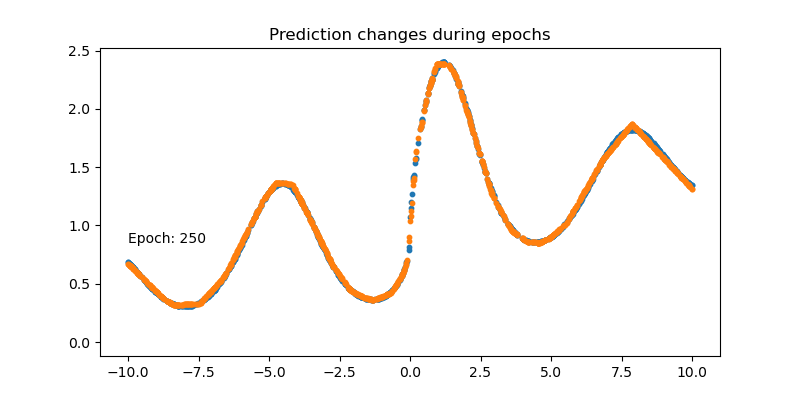

In [864]:
plt.ion()
fig = plt.figure(figsize = (8, 4))

ax = fig.add_subplot(111)
actual_line = ax.scatter(X, y, s = 10, label = 'actual')
prediction_line = ax.scatter(X, np.zeros(1000), s = 10, label = 'prediction')
epoch_num_line = ax.text(-10, 0.85, 'Epoch: ' + str(0))

plt.title('Prediction changes during epochs')

for epoch_num, i in enumerate(pred_at_each_epoch):
    prediction_line.set_offsets(np.c_[X, i])
    epoch_num_line.set_text('Epoch: ' + str(epoch_num+1))
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.01)